<a href="https://colab.research.google.com/github/jongbokhi/master_thesis_2023/blob/main/GridSearch_Cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import joblib

from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import precision_recall_curve, auc, roc_curve, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [ ]:
df_ids2018 = pd.read_csv('/content/drive/MyDrive/new_cic_ids_2018 data/extracted_ft_dos')

In [ ]:
print('Class distribution: ')
df_ids2018['Label'].value_counts()

Class distribution: 


0    1190978
1     196868
Name: Label, dtype: int64

In [ ]:
##Sampling
df_ids2018 = df_ids2018.sample(frac=0.1, random_state=12).reset_index(drop=True)

print('Class distribution: ')
df_ids2018['Label'].value_counts()

Class distribution: 


0    119027
1     19758
Name: Label, dtype: int64

In [ ]:
##Sort the feature and Target variable
ids2018_x = df_ids2018.drop('Label', axis=1).copy()
ids2018_y = df_ids2018['Label'].copy()

In [ ]:
#1. Split dataset into Training, Validation and Testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(ids2018_x, ids2018_y, test_size=0.33, random_state=12, stratify=ids2018_y)
#X_train_features, X_test, y_train_target, y_test = train_test_split(ids2018_x, ids2018_y, test_size=0.30, random_state=12, stratify=ids2018_y)

#X_train, X_val, y_train, y_val = train_test_split(X_train_features, y_train_target, test_size =0.2, random_state=12, stratify=y_train_target)


In [ ]:
# Scaling
from sklearn.preprocessing import MinMaxScaler
numerical_cols_train = X_train.columns
numerical_cols_test = X_test.columns

In [ ]:
scaler = MinMaxScaler()
X_train[numerical_cols_train] = scaler.fit_transform(X_train[numerical_cols_train])
X_test[numerical_cols_test] = scaler.transform(X_test[numerical_cols_test])

In [ ]:
#reset index
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [ ]:
##Save training and testing dataset

X_train.to_csv("/content/drive/MyDrive/new_cic_ids_2018 data/X_train.csv", index=False)

y_train.to_csv("/content/drive/MyDrive/new_cic_ids_2018 data/y_train.csv", index=False)

X_test.to_csv("/content/drive/MyDrive/new_cic_ids_2018 data/X_test.csv", index=False)

y_test.to_csv("/content/drive/MyDrive/new_cic_ids_2018 data/y_test.csv", index=False)

In [2]:
X_train = pd.read_csv('/content/drive/MyDrive/new_cic_ids_2018 data/X_train.csv')
y_train = pd.read_csv('/content/drive/MyDrive/new_cic_ids_2018 data/y_train.csv')
X_test = pd.read_csv('/content/drive/MyDrive/new_cic_ids_2018 data/X_test.csv')
y_test = pd.read_csv('/content/drive/MyDrive/new_cic_ids_2018 data/y_test.csv')

In [5]:
print(y_train.shape)

(92985, 1)


In [6]:
print(y_train)

       Label
0          1
1          0
2          1
3          0
4          0
...      ...
92980      0
92981      0
92982      0
92983      0
92984      0

[92985 rows x 1 columns]


In [7]:
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

In [8]:
print(y_train)

[1 0 1 ... 0 0 0]


In [ ]:
'''
# Standardize training dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))

X_train.columns = ids2018_x.columns

In [ ]:
'''
##Oversampling: SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where

# summarize class distribution
counter = Counter(y_train)
print("===============before==============")
print(counter)

# define the undersampling method
oversample = SMOTE(sampling_strategy= 0.5 , random_state=12, n_jobs= -1)
# transform the dataset
X_train, y_train = oversample.fit_resample(X_train, y_train)

# summarize the new class distribution
counter = Counter(y_train)
print("===============after==============")
print(counter)

===============before==============
Counter({0: 71255, 1: 11000})


/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


===============after==============
Counter({0: 71255, 1: 35627})


In [ ]:
'''
##Undersampling: OneSidedSelection
from collections import Counter
from imblearn.under_sampling import OneSidedSelection
from matplotlib import pyplot
from numpy import where

# summarize class distribution
counter = Counter(ids2018_y)
print("===============before==============")
print(counter)

# define the undersampling method
undersample = OneSidedSelection(n_neighbors=1, n_seeds_S=200)
# transform the dataset
ids2018_x, ids2018_y = undersample.fit_resample(ids2018_x, ids2018_y)
# summarize the new class distribution
counter = Counter(ids2018_y)
print("===============after==============")
print(counter)
'''

In [ ]:
'''
##Combination: Under and Oversampling
from collections import Counter
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.over_sampling import SMOTE

# summarize class distribution
#counter = Counter(ids2018_y)
#print("===============before==============")
#print(counter)
# define the undersampling method
#undersample = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'))
# transform the dataset
#ids2018_x, ids2018_y = undersample.fit_resample(ids2018_x, ids2018_y)
# summarize the new class distribution
#counter = Counter(ids2018_y)
#print("===============after==============")
#print(counter)
'''

"""
### Procedure on this notebook


1.Get GridSearch Result: Best hyperparameters, Best Scores

2.Prediction using Estimator that was chosen by the GridSearch for test dataset

3.Save the best hyperparameters for each model

"""

## Optimize Hyperparameter of each models

Models

>Random Forest, Decision Tree, Naive Baye, SVM

In [3]:
kf = StratifiedKFold(n_splits=5, random_state=13, shuffle=True)

##Random Forest


In [ ]:
##Baseline
#the default hyperparameters
rf = RandomForestClassifier(n_estimators=10, random_state=13, n_jobs=-1)

# Fit model
rf.fit(X_train, y_train)

#predict
rf_pred = rf.predict(X_test)

# print prediction results
print(classification_report(y_test, rf_pred))

<ipython-input-20-de962fcb6c27>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39280
           1       1.00      1.00      1.00      6520

    accuracy                           1.00     45800
   macro avg       1.00      1.00      1.00     45800
weighted avg       1.00      1.00      1.00     45800



In [ ]:

rf_pipeline = make_pipeline(SMOTE(sampling_strategy= 1 , random_state=12, n_jobs= -1), RandomForestClassifier(n_estimators=100, random_state=13, n_jobs=-1))

rf_pipeline

Pipeline(steps=[('smote',
                 SMOTE(n_jobs=-1, random_state=12, sampling_strategy=1)),
                ('randomforestclassifier',
                 RandomForestClassifier(n_jobs=-1, random_state=13))])

In [ ]:

# evaluate pipeline

cross_val_score(rf_pipeline, X_train, y_train, scoring='recall', cv=kf, n_jobs=-1)

array([1.        , 1.        , 1.        , 0.99962221, 1.        ])

In [ ]:
#GridSearch

%%time

rf_params = {
             'criterion': ['gini', 'entropy'],
             'n_estimators': [50, 100,200],
             'min_samples_leaf': [3, 0.0001, 0.0005, 0.00001],
             'min_samples_split': [8, 0.0005, 0.0001, 0.00001],
             'max_depth': [50, 100, 200],
             'random_state': [13]
             }


rf_new_params = {'randomforestclassifier__' + key: rf_params[key] for key in rf_params}

rf_grid = GridSearchCV(rf_pipeline, param_grid=rf_new_params, cv=kf, scoring='recall', n_jobs=-1,
                        return_train_score=True, verbose=0)
#Fit
rf_grid.fit(X_train, y_train)

##the result of GridSearch

  #Best Score: F1
rf_best = rf_grid.best_score_
  #Optimized hyperparameters
rf_opt_params = rf_grid.best_params_

print("=================GridSearch Result=================")
print()
print(f"GridSearch Best Score_recall: \n{rf_best}")
print(f"Best Hyperparameters: \n{rf_opt_params}")
print()
print("===================================================")

/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py:297: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, yt, **fit_params_last_step)


=================GridSearch Result=================

GridSearch Best Score_recall: 
0.9998488855307895
Best Hyperparameters: 
{'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_depth': 50, 'randomforestclassifier__min_samples_leaf': 3, 'randomforestclassifier__min_samples_split': 8, 'randomforestclassifier__n_estimators': 50, 'randomforestclassifier__random_state': 13}

CPU times: user 32.2 s, sys: 2.99 s, total: 35.2 s
Wall time: 52min 23s


In [ ]:
##evaluate Model

# Prediction using Estimator that was chosen by the GridSearch for testidation dataset
model_rf = rf_grid.best_estimator_

rf_test_pre = model_rf.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_test_pre)
rf_pre_f1 = f1_score(y_test, rf_test_pre)
rf_recall = recall_score(y_test, rf_test_pre)
rf_precison = precision_score(y_test, rf_test_pre)

print(classification_report(y_test, rf_test_pre))
print()
print("==================Evaluation Score==================")
print(f"test_Accuracy: \n{rf_accuracy}")
print(f"test_F1: \n{rf_pre_f1}")
print(f"test_Recall: \n{rf_recall}")
print(f"test_Precision: \n{rf_precison}")
print("===================================================")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39280
           1       1.00      1.00      1.00      6520

    accuracy                           1.00     45800
   macro avg       1.00      1.00      1.00     45800
weighted avg       1.00      1.00      1.00     45800


==================Evaluation Score==================
test_Accuracy: 
0.9998689956331878
test_F1: 
0.9995398773006134
test_Recall: 
0.9995398773006134
test_Precision: 
0.9995398773006134


In [ ]:
#Saving model
joblib.dump(model_rf, "/content/drive/MyDrive/saved_models/RandomForest_v2.pkl")

['/content/drive/MyDrive/saved_models/RandomForest_v2.pkl']

##Naive Bayes

In [9]:
##Baseline
#the default hyperparameters
nb = GaussianNB()

# Fit model
nb.fit(X_train, y_train)

#predict
nb_pred = nb.predict(X_test)

# print prediction results
print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.99      0.63      0.77     39280
           1       0.30      0.96      0.46      6520

    accuracy                           0.68     45800
   macro avg       0.65      0.80      0.62     45800
weighted avg       0.89      0.68      0.73     45800



In [10]:
nb_pipeline = make_pipeline(SMOTE(sampling_strategy= 1 , random_state=12, n_jobs= -1), GaussianNB())

nb_pipeline

Pipeline(steps=[('smote',
                 SMOTE(n_jobs=-1, random_state=12, sampling_strategy=1)),
                ('gaussiannb', GaussianNB())])

In [14]:
cross_val_score(nb_pipeline, X_train, y_train, scoring='accuracy', cv=kf, n_jobs=-1)

array([0.66591386, 0.67129107, 0.66940904, 0.66946282, 0.67849653])

In [17]:
#GridSearch
%%time

nb_params = [{'var_smoothing': np.logspace(0, -9, num=100)}]


nb_new_params = {'gaussiannb__' + key: value for param in nb_params for key, value in param.items()}

#nb_new_params = {'naivebayesclassifier__' + key: nb_params[key] for key in nb_params}

nb_grid = GridSearchCV(nb_pipeline, param_grid=nb_new_params, cv=kf, scoring='accuracy', n_jobs=-1,
                        return_train_score=True, verbose=0)

#Fit
nb_grid.fit(X_train, y_train)

##the result of GridSearch

  #Best Score: Accuracy
nb_best = nb_grid.best_score_
  #Optimized hyperparameters
nb_opt_params = nb_grid.best_params_

print("=================GridSearch Result=================")
print()
print(f"GridSearch Best Score_Recall: \n{nb_best}")
print(f"Best Hyperparameters: \n{nb_opt_params}")
print()
print("===================================================")

/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


=================GridSearch Result=================

GridSearch Best Score_Recall: 
0.9920524815830511
Best Hyperparameters: 
{'gaussiannb__var_smoothing': 0.0002310129700083158}

CPU times: user 4.06 s, sys: 1.15 s, total: 5.21 s
Wall time: 52.8 s


In [18]:
##Evaluate Model

# Prediction using Estimator that was chosen by the GridSearch for test dataset
model_nb = nb_grid.best_estimator_
nb_test_pre = model_nb.predict(X_test)


nb_pre_accuracy = accuracy_score(y_test, nb_test_pre)
nb_pre_f1 = f1_score(y_test, nb_test_pre)
nb_recall = recall_score(y_test, nb_test_pre)
nb_precision = precision_score(y_test, nb_test_pre)

print(classification_report(y_test, nb_test_pre))
print()
print("==================Evaluation Score==================")
print(f"test_Accuaracy: \n{nb_pre_accuracy}")
print(f"test_F1: \n{nb_pre_f1}")
print(f"test_Recall: \n{nb_recall}")
print(f"test_Precison: \n{nb_precision}")
print("===================================================")

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     39280
           1       0.96      0.98      0.97      6520

    accuracy                           0.99     45800
   macro avg       0.98      0.99      0.98     45800
weighted avg       0.99      0.99      0.99     45800


==================Evaluation Score==================
test_Accuaracy: 
0.990938864628821
test_F1: 
0.9684770224078997
test_Recall: 
0.977760736196319
test_Precison: 
0.9593679458239278


In [19]:
#Saving model
joblib.dump(model_nb, "/content/drive/MyDrive/saved_models/NaiveBayes_v2.pkl")

['/content/drive/MyDrive/saved_models/NaiveBayes_v2.pkl']

##Support Vector Machine

In [20]:
##Baseline
#the default hyperparameters
svc = SVC()
# Fit model
svc.fit(X_train, y_train)

#predict
svc_pred = svc.predict(X_test)

# print prediction results
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39280
           1       0.97      1.00      0.99      6520

    accuracy                           1.00     45800
   macro avg       0.99      1.00      0.99     45800
weighted avg       1.00      1.00      1.00     45800



In [21]:
svc_pipeline = make_pipeline(SMOTE(sampling_strategy= 1 , random_state=12, n_jobs= -1), SVC())

svc_pipeline

Pipeline(steps=[('smote',
                 SMOTE(n_jobs=-1, random_state=12, sampling_strategy=1)),
                ('svc', SVC())])

In [22]:
cross_val_score(svc_pipeline, X_train, y_train, scoring='recall', cv=kf, n_jobs=-1)

array([0.99962236, 1.        , 0.99962236, 0.99924443, 0.99962221])

In [23]:
#GridSearch
%%time

svc_params =  {'C': [1, 10],
                'gamma': [1, 0.1],
                'kernel': ['rbf', 'linear']
                }


svc_new_params = {'svc__' + key: svc_params[key] for key in svc_params}

svc_grid = GridSearchCV(svc_pipeline, param_grid=svc_new_params, cv=kf, scoring='recall', n_jobs=-1,
                        return_train_score=True, verbose=0)

#Fit
svc_grid.fit(X_train, y_train)

##the result of GridSearch

  #Best Score: Recall
svc_best = svc_grid.best_score_
  #Optimized hyperparameters
svc_opt_params = svc_grid.best_params_

print("=================GridSearch Result=================")
print()
print(f"GridSearch Best Score_Recall: \n{svc_best}")
print(f"Best Hyperparameters: \n{svc_opt_params}")
print()
print("===================================================")

/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


=================GridSearch Result=================

GridSearch Best Score_Recall: 
0.9996222708943716
Best Hyperparameters: 
{'svc__C': 10, 'svc__gamma': 1, 'svc__kernel': 'rbf'}

CPU times: user 4min 43s, sys: 2.51 s, total: 4min 45s
Wall time: 41min 55s


In [24]:
##Evaluate Model

# Prediction using Estimator that was chosen by the GridSearch for test dataset
model_svc = svc_grid.best_estimator_
svc_test_pre = model_svc.predict(X_test)

svc_pre_accuracy = accuracy_score(y_test, svc_test_pre)
svc_pre_f1 = f1_score(y_test, svc_test_pre)
svc_recall= recall_score(y_test, svc_test_pre)
svc_precision = precision_score(y_test, svc_test_pre)

print(classification_report(y_test, svc_test_pre))
print()
print("==================Evaluation Score==================")
print(f"test_Accuracy: \n{svc_pre_accuracy}")
print(f"test_F1: \n{svc_pre_f1}")
print(f"test_Recall: \n{svc_recall}")
print(f"test_Precision: \n{svc_precision}")
print("===================================================")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39280
           1       0.97      1.00      0.99      6520

    accuracy                           1.00     45800
   macro avg       0.99      1.00      0.99     45800
weighted avg       1.00      1.00      1.00     45800


==================Evaluation Score==================
test_Accuracy: 
0.9958515283842795
test_F1: 
0.9856191341204965
test_Recall: 
0.9986196319018404
test_Precision: 
0.9729527794381351


In [25]:
#Saving model
joblib.dump(model_svc, "/content/drive/MyDrive/saved_models/SVC_v2.pkl")

['/content/drive/MyDrive/saved_models/SVC_v2.pkl']

##XGBoost

In [26]:
##Baseline
from xgboost import XGBClassifier
#the default hyperparameters
xgb = XGBClassifier(objective= 'binary:logistic', seed=42)
# Fit model
xgb.fit(X_train, y_train)

#predict
xgb_pred = xgb.predict(X_test)

# print prediction results
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39280
           1       1.00      1.00      1.00      6520

    accuracy                           1.00     45800
   macro avg       1.00      1.00      1.00     45800
weighted avg       1.00      1.00      1.00     45800



In [27]:
xgb_pipeline = make_pipeline(SMOTE(sampling_strategy= 1 , random_state=12, n_jobs= -1), XGBClassifier(objective= 'binary:logistic', seed=42))

xgb_pipeline

Pipeline(steps=[('smote',
                 SMOTE(n_jobs=-1, random_state=12, sampling_strategy=1)),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [28]:
cross_val_score(xgb_pipeline, X_train, y_train, scoring='recall', cv=kf, n_jobs=-1)

array([1.        , 0.99962236, 1.        , 0.99962221, 0.99962221])

In [29]:
#GridSearch
%%time

xgb_params = {
        'n_estimators':[50, 100, 200],
        'learning_rate': [0.1, 0.01],
        'min_child_weight': [1, 5, 10],
        'gamma': [0.1, 0.5],
        'subsample': [0.5, 1.0],
        'colsample_bytree': [0.5, 1.0],
        'max_depth': [5,10]
        }

xgb_new_params = {'xgbclassifier__' + key: xgb_params[key] for key in xgb_params}

xgb_grid = GridSearchCV(xgb_pipeline, param_grid= xgb_new_params, cv=kf, scoring='recall', n_jobs=-1,
                        return_train_score=True, verbose=0)

#Fit
xgb_grid.fit(X_train, y_train)

##the result of GridSearch

  #Best Score: Recall
xgb_best = xgb_grid.best_score_
  #Optimized hyperparameters
xgb_opt_params = xgb_grid.best_params_

print("=================GridSearch Result=================")
print()
print(f"GridSearch Best Score_Recall: \n{xgb_best}")
print(f"Best Hyperparameters: \n{xgb_opt_params}")
print()
print("===================================================")

/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


=================GridSearch Result=================

GridSearch Best Score_Recall: 
0.9998489140644885
Best Hyperparameters: 
{'xgbclassifier__colsample_bytree': 0.5, 'xgbclassifier__gamma': 0.1, 'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': 5, 'xgbclassifier__min_child_weight': 1, 'xgbclassifier__n_estimators': 200, 'xgbclassifier__subsample': 1.0}

CPU times: user 2min 5s, sys: 3.98 s, total: 2min 9s
Wall time: 1h 6min 49s


In [30]:
##Evaluate Model

# Prediction using Estimator that was chosen by the GridSearch for testing dataset
model_xgb = xgb_grid.best_estimator_
xgb_test_pre = model_xgb.predict(X_test)

xgb_pre_accuracy = accuracy_score(y_test, xgb_test_pre)
xgb_pre_f1 = f1_score(y_test, xgb_test_pre)
xgb_recall= recall_score(y_test, xgb_test_pre)
xgb_precision = precision_score(y_test, xgb_test_pre)

print(classification_report(y_test, xgb_test_pre))
print()
print("==================Evaluation Score==================")
print(f"test_F1: \n{xgb_pre_accuracy}")
print(f"test_F1: \n{xgb_pre_f1}")
print(f"test_Recall: \n{xgb_recall}")
print(f"test_Precision: \n{xgb_precision}")
print("===================================================")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39280
           1       1.00      1.00      1.00      6520

    accuracy                           1.00     45800
   macro avg       1.00      1.00      1.00     45800
weighted avg       1.00      1.00      1.00     45800


==================Evaluation Score==================
test_F1: 
0.9998908296943232
test_F1: 
0.9996165350103535
test_Recall: 
0.9995398773006134
test_Precision: 
0.9996932044792146


In [31]:
#Saving model
joblib.dump(model_xgb, "/content/drive/MyDrive/saved_models/XGBoost_v2.pkl")

['/content/drive/MyDrive/saved_models/XGBoost_v2.pkl']

##LightGBM

In [32]:
##Baseline
import lightgbm as lgb
#the default hyperparameters
lgbm = lgb.LGBMClassifier()
# Fit model
lgbm.fit(X_train, y_train)

#predict
lgbm_pred = lgbm.predict(X_test)

# print prediction results
print(classification_report(y_test, lgbm_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39280
           1       1.00      1.00      1.00      6520

    accuracy                           1.00     45800
   macro avg       1.00      1.00      1.00     45800
weighted avg       1.00      1.00      1.00     45800



In [33]:
lgbm_pipeline = make_pipeline(SMOTE(sampling_strategy= 1 , random_state=12, n_jobs= -1), lgb.LGBMClassifier())

lgbm_pipeline

Pipeline(steps=[('smote',
                 SMOTE(n_jobs=-1, random_state=12, sampling_strategy=1)),
                ('lgbmclassifier', LGBMClassifier())])

In [34]:
cross_val_score(lgbm_pipeline, X_train, y_train, scoring='recall', cv=kf, n_jobs=-1)

array([1.        , 1.        , 1.        , 0.99962221, 0.99962221])

In [35]:
#GridSearch
%%time

lgbm_params = {
    'n_estimators':[100, 200, 300],
    'num_leaves':[20,60,100],
    'max_depth':[5,10,15],
    'min_child_samples':[5,10,15],
    'learning_rate':[0.01, 0.05, 0.1],
    'reg_alpha':[0,0.01,0.03]
    }


lgbm_new_params = {'lgbmclassifier__' + key: lgbm_params[key] for key in lgbm_params}

lgbm_grid = GridSearchCV(lgbm_pipeline, param_grid= lgbm_new_params, cv=kf, scoring='recall', n_jobs=-1,
                        return_train_score=True, verbose=0)

#Fit
lgbm_grid.fit(X_train, y_train)

##the result of GridSearch

  #Best Score: Recall
lgbm_best = lgbm_grid.best_score_
  #Optimized hyperparameters
lgbm_opt_params = lgbm_grid.best_params_

print("=================GridSearch Result=================")
print()
print(f"GridSearch Best Score_Recall: \n{lgbm_best}")
print(f"Best Hyperparameters: \n{lgbm_opt_params}")
print()
print("===================================================")

/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


=================GridSearch Result=================

GridSearch Best Score_Recall: 
0.9999244427653948
Best Hyperparameters: 
{'lgbmclassifier__learning_rate': 0.05, 'lgbmclassifier__max_depth': 10, 'lgbmclassifier__min_child_samples': 5, 'lgbmclassifier__n_estimators': 300, 'lgbmclassifier__num_leaves': 20, 'lgbmclassifier__reg_alpha': 0.01}

CPU times: user 39.3 s, sys: 2.92 s, total: 42.2 s
Wall time: 33min 24s


In [36]:

##Evaluate Model

# Prediction using Estimator that was chosen by the GridSearch for testing dataset
model_lgbm = lgbm_grid.best_estimator_
lgbm_test_pre = model_lgbm.predict(X_test)

lgbm_pre_accuracy = accuracy_score(y_test, lgbm_test_pre)
lgbm_pre_f1 = f1_score(y_test, lgbm_test_pre)
lgbm_recall= recall_score(y_test, lgbm_test_pre)
lgbm_precision = precision_score(y_test, lgbm_test_pre)

print(classification_report(y_test, lgbm_test_pre))
print()
print("==================Evaluation Score==================")
print(f"test_Accuracy: \n{lgbm_pre_accuracy}")
print(f"test_F1: \n{lgbm_pre_f1}")
print(f"test_Recall: \n{lgbm_recall}")
print(f"test_Precision: \n{lgbm_precision}")
print("===================================================")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39280
           1       1.00      1.00      1.00      6520

    accuracy                           1.00     45800
   macro avg       1.00      1.00      1.00     45800
weighted avg       1.00      1.00      1.00     45800


==================Evaluation Score==================
test_Accuracy: 
0.9998908296943232
test_F1: 
0.9996165350103535
test_Recall: 
0.9995398773006134
test_Precision: 
0.9996932044792146


In [37]:
#Saving model
joblib.dump(model_lgbm, "/content/drive/MyDrive/saved_models/Lightgbm_v2.pkl")

['/content/drive/MyDrive/saved_models/Lightgbm_v2.pkl']

##Decision Tree

Optimal alpha value: 8.453556307657983e-05
CPU times: user 22.5 s, sys: 36.7 ms, total: 22.6 s
Wall time: 22.5 s


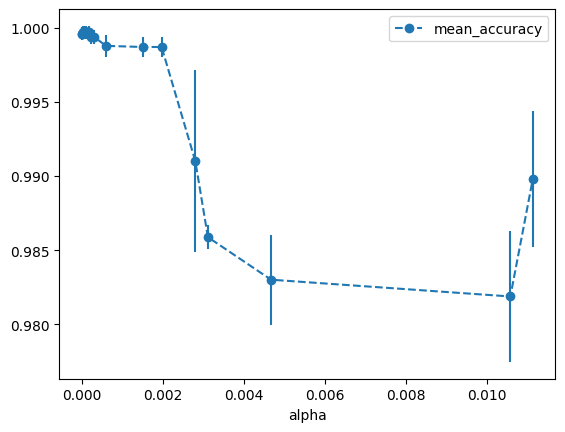

In [38]:
%%time

dt = tree.DecisionTreeClassifier(criterion='entropy')

path = dt.cost_complexity_pruning_path(X_train, y_train)

ccp_alphas = path.ccp_alphas

ccp_alphas = ccp_alphas[:-1] # exlude the maximum value

alpha_loop_values = []

for ccp_alpha in ccp_alphas:

    dt = tree.DecisionTreeClassifier(criterion='entropy', ccp_alpha=ccp_alpha)

    scores = cross_val_score(dt, X_train, y_train, scoring='recall', cv=kf)

    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])


# Plot a graph of the means and standard deviations of the scores for each candidate
alpha_results = pd.DataFrame(alpha_loop_values, columns=['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x='alpha',
                    y='mean_accuracy',
                    yerr='std',
                    marker='o',
                    linestyle='--')

ideal_ccp_alpha = alpha_results.sort_values(by=['mean_accuracy'], ascending=False).iloc[0]
ideal_ccp_alpha = float(ideal_ccp_alpha['alpha'])
print(f"Optimal alpha value: {ideal_ccp_alpha}")

In [39]:
# build the optimum tree
decision_tree = tree.DecisionTreeClassifier(criterion='entropy', ccp_alpha=ideal_ccp_alpha)
decision_tree.fit(X_train, y_train)
model_dt = decision_tree
dt_test_pre = model_dt.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_test_pre)
dt_pre_f1 = f1_score(y_test, dt_test_pre)
dt_recall= recall_score(y_test, dt_test_pre)
dt_precision = precision_score(y_test, dt_test_pre)


print("==================Evaluation Score==================")
print(f"Accuracy: {dt_accuracy:.5f}")
print(f"test_F1: \n{dt_pre_f1}")
print(f"test_Recall: \n{dt_recall}")
print(f"test_Precision: \n{dt_precision}")
print("===================================================")

==================Evaluation Score==================
Accuracy: 0.99985
test_F1: 
0.999463149014495
test_Recall: 
0.9993865030674847
test_Precision: 
0.9995398067188219


In [40]:
#Saving model
joblib.dump(model_dt, "/content/drive/MyDrive/saved_models/decisiontree_v2.pkl")

['/content/drive/MyDrive/saved_models/decisiontree_v2.pkl']

##Logistic Regression

In [41]:
##Baseline
from sklearn.linear_model import LogisticRegression
#the default hyperparameters
lg = LogisticRegression()
# Fit model
lg .fit(X_train, y_train)

#predict
lg_pred = lg.predict(X_test)

# print prediction results
print(classification_report(y_test, lg_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     39280
           1       0.95      0.99      0.97      6520

    accuracy                           0.99     45800
   macro avg       0.97      0.99      0.98     45800
weighted avg       0.99      0.99      0.99     45800



In [42]:
lg_pipeline = make_pipeline(SMOTE(sampling_strategy= 1 , random_state=12, n_jobs= -1), LogisticRegression())

lg_pipeline

Pipeline(steps=[('smote',
                 SMOTE(n_jobs=-1, random_state=12, sampling_strategy=1)),
                ('logisticregression', LogisticRegression())])

In [43]:
cross_val_score(lg_pipeline, X_train, y_train, scoring='recall', cv=kf, n_jobs=-1)

array([0.99244713, 0.9913142 , 0.99282477, 0.9916887 , 0.99282206])

In [49]:
#GridSearch
%%time

lg_params =  {'penalty':['l2', 'none'],
             'C':[1,10, 100, 1000],
             'max_iter':[500, 1000, 1500],
             'solver' : ['lbfgs', 'sag', 'saga']
             }


lg_new_params = {'logisticregression__' + key: lg_params[key] for key in lg_params}

lg_grid = GridSearchCV(lg_pipeline, param_grid= lg_new_params, cv=kf, scoring='recall', n_jobs=-1,
                        return_train_score=True, verbose=0)

#Fit
lg_grid.fit(X_train, y_train)

##the result of GridSearch

  #Best Score: Recall
lg_best = lg_grid.best_score_
  #Optimized hyperparameters
lg_opt_params = lg_grid.best_params_

print("=================GridSearch Result=================")
print()
print(f"GridSearch Best Score_Recall: \n{lg_best}")
print(f"Best Hyperparameters: \n{lg_opt_params}")
print()
print("===================================================")

/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


=================GridSearch Result=================

GridSearch Best Score_Recall: 
0.9926726317315276
Best Hyperparameters: 
{'logisticregression__C': 1, 'logisticregression__max_iter': 1500, 'logisticregression__penalty': 'none', 'logisticregression__solver': 'lbfgs'}

CPU times: user 58.6 s, sys: 2min 6s, total: 3min 5s
Wall time: 24min 22s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
##Evaluate Model

# Prediction using Estimator that was chosen by the GridSearch for testing dataset
model_lg = lg_grid.best_estimator_

lg_test_pre = model_lg.predict(X_test)

lg_pre_accuracy = accuracy_score(y_test, lg_test_pre)
lg_pre_f1 = f1_score(y_test, lg_test_pre)
lg_recall= recall_score(y_test, lg_test_pre)
lg_precision = precision_score(y_test, lg_test_pre)

print(classification_report(y_test, lg_test_pre))
print()
print("==================Evaluation Score==================")
print(f"test_Accuracy: \n{lg_pre_accuracy}")
print(f"test_F1: \n{lg_pre_f1}")
print(f"test_Recall: \n{lg_recall}")
print(f"test_Precision: \n{lg_precision}")
print("===================================================")

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     39280
           1       0.94      0.99      0.97      6520

    accuracy                           0.99     45800
   macro avg       0.97      0.99      0.98     45800
weighted avg       0.99      0.99      0.99     45800


==================Evaluation Score==================
test_Accuracy: 
0.9900873362445415
test_F1: 
0.966104225772734
test_Recall: 
0.9923312883435583
test_Precision: 
0.9412278149549025


In [52]:
#Saving model
joblib.dump(model_lg, "/content/drive/MyDrive/saved_models/logisticregression_v2.pkl")

['/content/drive/MyDrive/saved_models/logisticregression_v2.pkl']